Dataset Loaded Successfully
Shape: (1118669, 34)


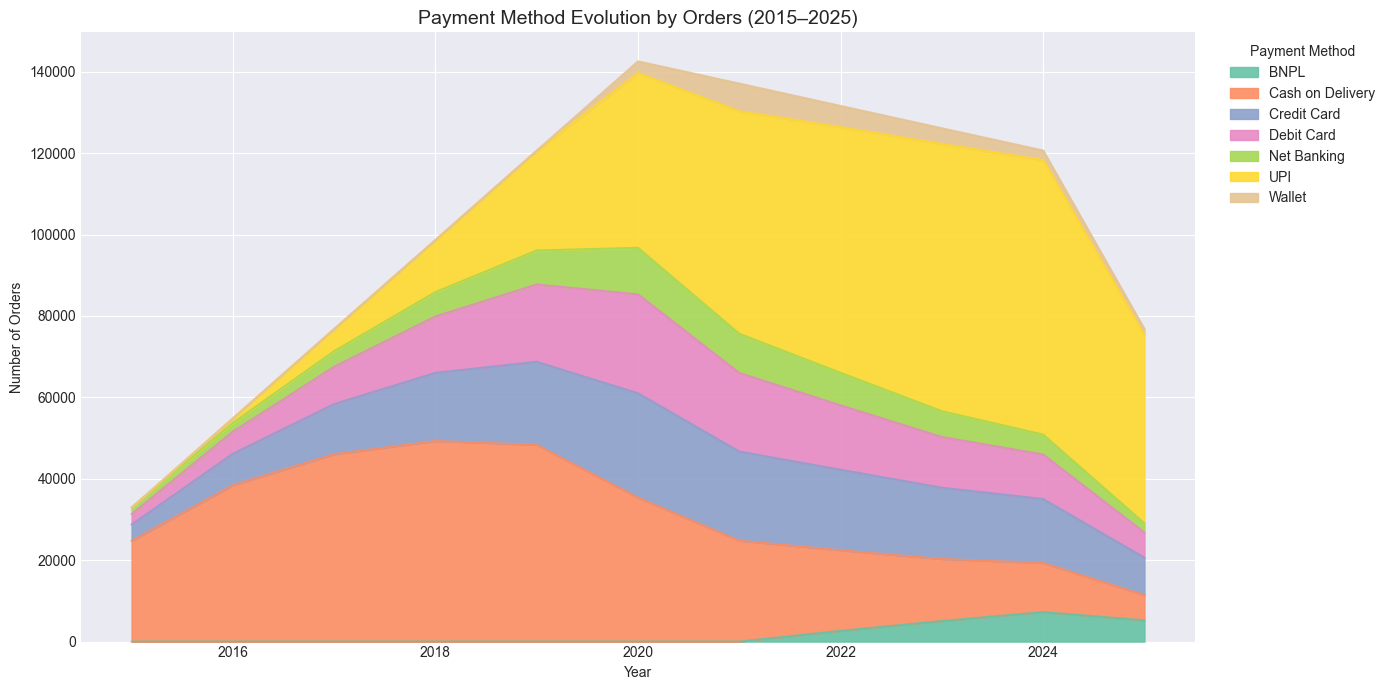

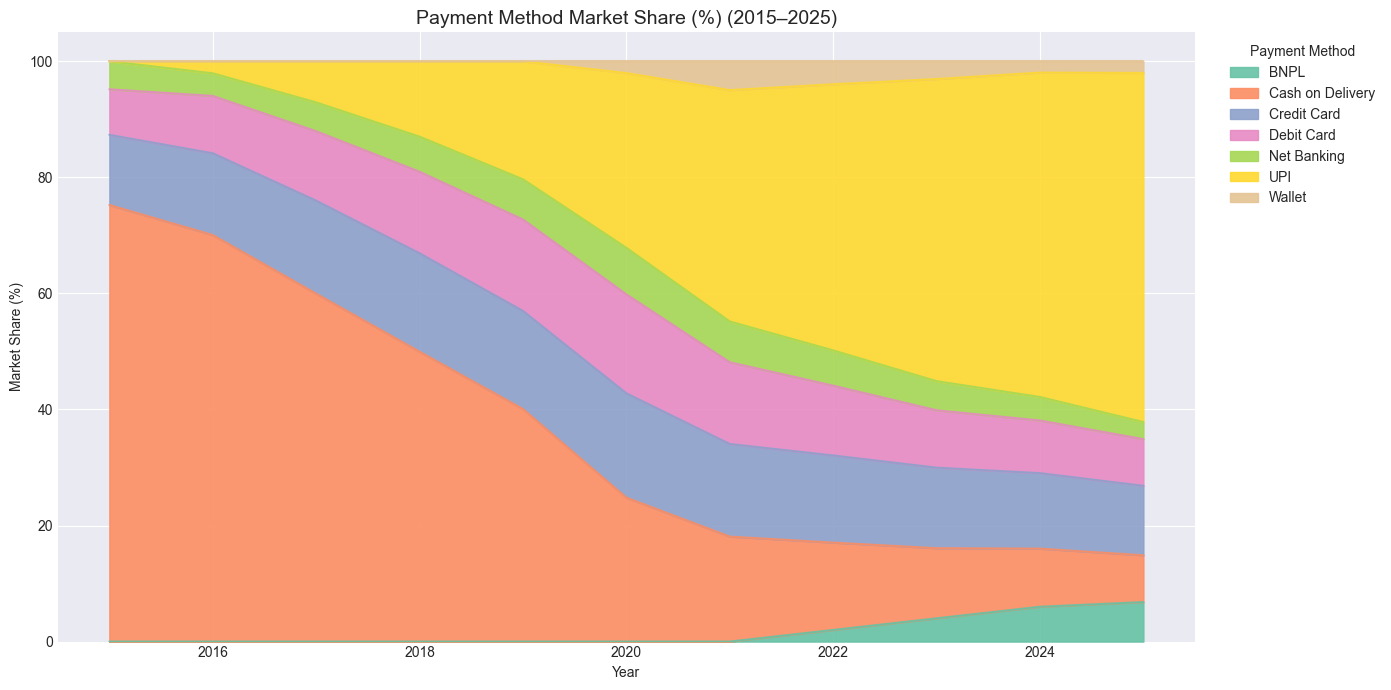

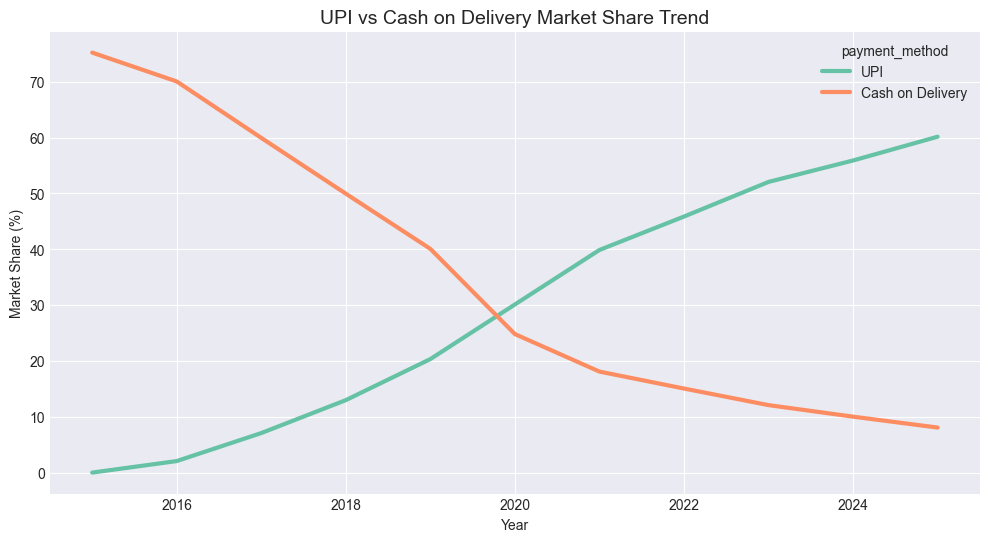

KEY INSIGHTS:
- Strong rise of UPI after 2018
- Continuous decline of Cash on Delivery
- Shift toward prepaid & digital payments
- Improved operational efficiency & cash flow
EDA_03 COMPLETED SUCCESSFULLY


In [1]:
# =========================================================
# EDA_03: PAYMENT METHODS EVOLUTION (2015–2025)
# Question Covered:
# Q4 - Visualize evolution of payment methods,
#      Rise of UPI, Decline of COD, Market Share changes
# =========================================================

# =========================
# IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")

# =========================
# LOAD MASTER DATASET
# =========================
DATA_PATH = "../master/amazon_india_master_2015_2025.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset Loaded Successfully")
print("Shape:", df.shape)

# =========================
# BASIC VALIDATION
# =========================
df["payment_method"] = df["payment_method"].fillna("Unknown")

major_methods = [
    "UPI",
    "Cash on Delivery",
    "Credit Card",
    "Debit Card",
    "Net Banking",
    "Wallet",
    "BNPL"
]

df["payment_method"] = df["payment_method"].where(
    df["payment_method"].isin(major_methods),
    "Other"
)

# =========================
# YEARLY PAYMENT USAGE
# =========================
payment_yearly = (
    df.groupby(["order_year", "payment_method"])
      .size()
      .reset_index(name="orders")
)

# =========================
# PIVOT FOR VISUALIZATION
# =========================
pivot_orders = payment_yearly.pivot(
    index="order_year",
    columns="payment_method",
    values="orders"
).fillna(0)

# =========================
# STACKED AREA CHART (ORDERS)
# =========================
pivot_orders.plot(
    kind="area",
    stacked=True,
    figsize=(14, 7),
    alpha=0.9
)

plt.title("Payment Method Evolution by Orders (2015–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.legend(title="Payment Method", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

# =========================
# MARKET SHARE CALCULATION
# =========================
pivot_share = pivot_orders.div(pivot_orders.sum(axis=1), axis=0) * 100

# =========================
# STACKED AREA CHART (MARKET SHARE %)
# =========================
pivot_share.plot(
    kind="area",
    stacked=True,
    figsize=(14, 7),
    alpha=0.9
)

plt.title("Payment Method Market Share (%) (2015–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.legend(title="Payment Method", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

# =========================
# UPI vs COD COMPARISON
# =========================
upi_cod_trend = pivot_share[["UPI", "Cash on Delivery"]]

upi_cod_trend.plot(
    figsize=(12, 6),
    linewidth=3
)

plt.title("UPI vs Cash on Delivery Market Share Trend", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.grid(True)
plt.show()

# =========================
# SUMMARY INSIGHTS (PRINT)
# =========================
print("KEY INSIGHTS:")
print("- Strong rise of UPI after 2018")
print("- Continuous decline of Cash on Delivery")
print("- Shift toward prepaid & digital payments")
print("- Improved operational efficiency & cash flow")

print("EDA_03 COMPLETED SUCCESSFULLY")
